# TELECOM CHURN PREDICTION 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%matplotlib inline

In [5]:
df = pd.read_csv(filepath_or_buffer = 'C:/Users/abi/Desktop/telcom-churn.csv')

In [6]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [7]:
df.shape

(7043, 21)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df.SeniorCitizen.unique()

array([0, 1], dtype=int64)

In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [11]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [12]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [13]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [14]:
df['MonthlyCharges']

0        29.85
1        56.95
2        53.85
3        42.30
4        70.70
         ...  
7038     84.80
7039    103.20
7040     29.60
7041     74.40
7042    105.65
Name: MonthlyCharges, Length: 7043, dtype: float64

In [15]:
no_value_list_index = list(df[df['TotalCharges'] == " "].index)

In [16]:
no_value_list_index

[488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]

In [17]:
replacement_value = df.iloc[no_value_list_index]['MonthlyCharges']

In [18]:
replacement_value

488     52.55
753     20.25
936     80.85
1082    25.75
1340    56.05
3331    19.85
3826    25.35
4380    20.00
5218    19.70
6670    73.35
6754    61.90
Name: MonthlyCharges, dtype: float64

In [19]:
df.iloc[no_value_list_index].head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No


In [20]:
df['TotalCharges'].replace(' ',  np.nan, inplace = True)

In [21]:
df.loc[no_value_list_index]['TotalCharges'].head(2)

488    NaN
753    NaN
Name: TotalCharges, dtype: object

In [22]:
df['TotalCharges'].fillna(replacement_value, inplace=True)

In [23]:
df.loc[no_value_list_index]['TotalCharges'].head(2)

488    52.55
753    20.25
Name: TotalCharges, dtype: object

In [24]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [25]:
type(df['TotalCharges'][0])

numpy.float64

<AxesSubplot:xlabel='TotalCharges', ylabel='Count'>

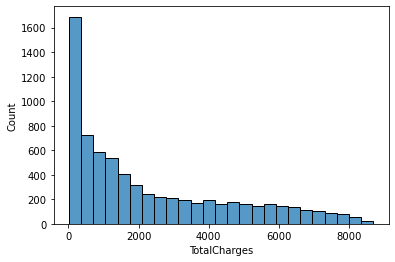

In [26]:
sns.histplot(data = df, x = 'TotalCharges')

<AxesSubplot:xlabel='tenure', ylabel='Count'>

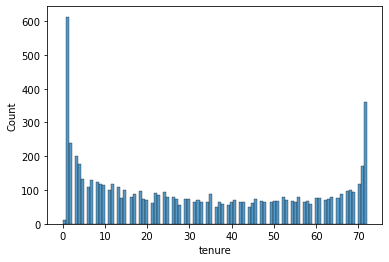

In [28]:
sns.histplot(df, x= df['tenure'], bins = 100)

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

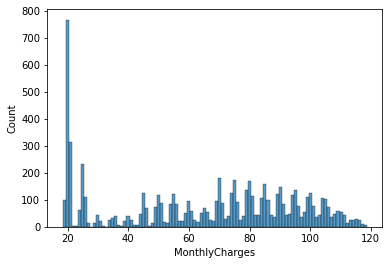

In [29]:
sns.histplot(df, x= df['MonthlyCharges'], bins = 100)

In [30]:
df.drop(['customerID'], inplace = True, axis=1)

In [31]:
numerical_df = df[['tenure', 'MonthlyCharges', 'TotalCharges']]

In [32]:
numerical_df.head(2)

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50


In [33]:
categorical_df =df[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']]

In [34]:
categorical_df.head(2)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No


In [35]:
categorical_df.OnlineBackup.unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [41]:
one_hot_encoded_categorical_data = pd.get_dummies(categorical_df, columns = ['gender','SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn'], dtype='int') 


In [42]:
one_hot_encoded_categorical_data.drop(['Churn_No'],axis=1, inplace = True)

In [43]:
one_hot_encoded_categorical_data.shape

(7043, 44)

In [44]:
one_hot_encoded_categorical_data.head(2)

,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,1,0,1,0,0,1,1,0,1,0,...,1,0,0,0,1,0,0,1,0,0
1,0,1,1,0,1,0,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0


In [45]:
from sklearn.preprocessing import MinMaxScaler


In [49]:
minmax_scaler_obj = MinMaxScaler()

In [50]:
standardized_numerical_data = minmax_scaler_obj.fit_transform(numerical_df)

C:\Users\abi\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
C:\Users\abi\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


In [51]:
standardized_numerical_data

array([[0.01388889, 0.11542289, 0.0012751 ],
       [0.47222222, 0.38507463, 0.21586661],
       [0.02777778, 0.35422886, 0.01031041],
       ...,
       [0.15277778, 0.11293532, 0.03780868],
       [0.05555556, 0.55870647, 0.03321025],
       [0.91666667, 0.86965174, 0.78764136]])

In [52]:
transformed_numerical_df = pd.DataFrame(standardized_numerical_data, columns = ['tenure', 'MonthlyCharges', 'TotalCharges'] )

In [53]:
transformed_numerical_df.head(2)

,tenure,MonthlyCharges,TotalCharges
0,0.013889,0.115423,0.001275
1,0.472222,0.385075,0.215867


In [54]:
final_df = one_hot_encoded_categorical_data.join(transformed_numerical_df)

In [55]:
final_df.head(2)

,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,...,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,tenure,MonthlyCharges,TotalCharges
0,1,0,1,0,0,1,1,0,1,0,...,0,1,0,0,1,0,0,0.013889,0.115423,0.001275
1,0,1,1,0,1,0,1,0,0,1,...,1,0,0,0,0,1,0,0.472222,0.385075,0.215867


In [56]:
final_df.drop(['gender_Female', 'SeniorCitizen_0', 'Partner_No',
               'Dependents_No', 'PaperlessBilling_No', 'PhoneService_No'], axis = 1, inplace = True)

In [57]:
final_df.head(2)

,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,tenure,MonthlyCharges,TotalCharges
0,0,0,1,0,0,0,1,0,1,0,...,0,1,0,0,1,0,0,0.013889,0.115423,0.001275
1,1,0,0,0,1,1,0,0,1,0,...,0,0,0,0,0,1,0,0.472222,0.385075,0.215867


In [58]:
X = final_df.drop(['Churn_Yes'], axis = 1)

In [59]:
y = final_df['Churn_Yes']

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [63]:
models = {
    "LogisticRegression" : LogisticRegression(),
    "DecisionTreeClassifier" : DecisionTreeClassifier(),
    "RandomForestClassifier" : RandomForestClassifier(),
    "SVC" : SVC(),
    "KNeighborsClassifier" : KNeighborsClassifier(),
    "GaussianNB" : GaussianNB()   
}

In [64]:
params = {
    "LogisticRegression" : {'C':[0.01, 1, 10], 'penalty' :['l1', 'l2', 'elasticnet']},
    "DecisionTreeClassifier" : {'splitter':['best','random'], 'criterion':['gini', 'entropy']},
    "RandomForestClassifier" : {'n_estimators': [8,16,32,64,128,256]},
    "SVC" : {  'C': [1.0, 10, 100], 'kernel': ['rbf', 'linear'], 'gamma' : ['scale', 1]},
    "KNeighborsClassifier" : { 'metric': ['euclidean', 'manhattan'], 'n_neighbors' : [5,7,10]},
    "GaussianNB" : {}
}
    
    

In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score

In [66]:
def evaluate_models(X_train, y_train, X_test, y_test, models, param):
    
    report = {}
    
    for i in range(len(models)):
        
        current_model_name = list(models.keys())[i]
        current_model_object = models[current_model_name]
        current_params = param[current_model_name]
        
        grid_search_object = GridSearchCV(current_model_object, current_params,cv=3)
        grid_search_object.fit(X_train,y_train)
        
        current_model_object.set_params(**grid_search_object.best_params_)
        current_model_object.fit(X_train,y_train)
        
        y_test_pred = current_model_object.predict(X_test)
        
        test_model_accuracy = accuracy_score(y_test, y_test_pred)

        report[list(models.keys())[i]] = {'test_model_accuracy' : test_model_accuracy, 
                                          'parameter' : grid_search_object.best_params_}

    return report               


In [67]:
model_report = evaluate_models(X_train, y_train, X_test, y_test, models, params)

C:\Users\abi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\abi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\abi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\abi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\abi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.

C:\Users\abi\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
C:\Users\abi\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
C:\Users\abi\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
C:\Users\abi\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
C:\Users\abi\anacond

C:\Users\abi\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
C:\Users\abi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\abi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\abi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\abi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'no

C:\Users\abi\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
C:\Users\abi\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
C:\Users\abi\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
C:\Users\abi\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
C:\Users\abi\anacond

C:\Users\abi\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
C:\Users\abi\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
C:\Users\abi\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
C:\Users\abi\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
C:\Users\abi\anacond

C:\Users\abi\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
C:\Users\abi\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
C:\Users\abi\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
C:\Users\abi\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
C:\Users\abi\anacond

C:\Users\abi\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
C:\Users\abi\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
C:\Users\abi\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
C:\Users\abi\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
C:\Users\abi\anacond

C:\Users\abi\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
C:\Users\abi\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
C:\Users\abi\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
C:\Users\abi\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
C:\Users\abi\anacond

In [68]:
model_report

{'LogisticRegression': {'test_model_accuracy': 0.8130619971604354,
  'parameter': {'C': 10, 'penalty': 'l2'}},
 'DecisionTreeClassifier': {'test_model_accuracy': 0.7382867960246096,
  'parameter': {'criterion': 'entropy', 'splitter': 'random'}},
 'RandomForestClassifier': {'test_model_accuracy': 0.7950780880265026,
  'parameter': {'n_estimators': 128}},
 'SVC': {'test_model_accuracy': 0.807382867960246,
  'parameter': {'C': 1.0, 'gamma': 'scale', 'kernel': 'linear'}},
 'KNeighborsClassifier': {'test_model_accuracy': 0.783719829626124,
  'parameter': {'metric': 'manhattan', 'n_neighbors': 10}},
 'GaussianNB': {'test_model_accuracy': 0.7004259346900142, 'parameter': {}}}

In [69]:
model_df = pd.DataFrame.from_dict(model_report, orient='index')

In [70]:
model_df.sort_values(by=['test_model_accuracy'], ascending = False, inplace= True)

,test_model_accuracy,parameter
LogisticRegression,0.813062,"{'C': 10, 'penalty': 'l2'}"
SVC,0.807383,"{'C': 1.0, 'gamma': 'scale', 'kernel': 'linear'}"
RandomForestClassifier,0.795078,{'n_estimators': 128}
KNeighborsClassifier,0.783720,"{'metric': 'manhattan', 'n_neighbors': 10}"
DecisionTreeClassifier,0.738287,"{'criterion': 'entropy', 'splitter': 'random'}"
GaussianNB,0.700426,{}


In [71]:
best_model = model_df.head(1)

In [72]:
best_model

,test_model_accuracy,parameter
LogisticRegression,0.813062,"{'C': 10, 'penalty': 'l2'}"


In [73]:
model_obj = models[best_model.index[0]]

In [74]:
model_obj.set_params(**best_model.parameter[0])

C:\Users\abi\AppData\Local\Temp/ipykernel_14160/2930595909.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  model_obj.set_params(**best_model.parameter[0])


LogisticRegression(C=10)

In [75]:
model_obj.fit(X_train, y_train)

C:\Users\abi\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


LogisticRegression(C=10)

In [81]:
model_prediction = model_obj.predict(X_test)

C:\Users\abi\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


In [77]:
confusion_matrix = confusion_matrix(y_test, model_prediction)

In [78]:
print(confusion_matrix)

[[1387  152]
 [ 243  331]]


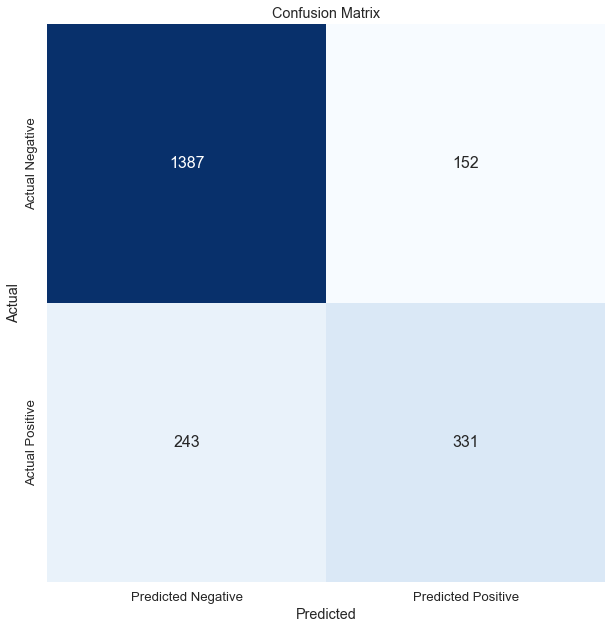

In [79]:
plt.figure(figsize=(10, 40))  # Adjust the figure size as needed
sns.set(font_scale=1.2)  # Set font scale for labels
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues',
            annot_kws={"size": 16}, cbar=False, square=True,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()